##  <u> Project description/introduction text (the background information) </u>

## Topic - Heart Disease Prediction using Machine Learning
#### Introduction
Heart related diseases or Cardiovascular Diseases (CVDs) are the main reason for a huge number of death in the world over the last few decades and has emerged as the most life-threatening disease. Heart disease is the leading cause of death in the United States, causing about 1 in 4 deaths. The term “heart disease” refers to several types of heart conditions. In the United States, the most common type of heart disease is coronary artery disease (CAD), which can lead to heart attack.
#### Problem Definition
As per the recent study by WHO, heart related diseases are increasing. 17.9 million People die every-year due to this. With growing population, it gets further difficult to diagnose and start treatment at early stage. Early detection and treatment of several heart diseases is very complex because of the lack of diagnostic centers, qualified doctors and other resources that affect the accurate prognosis of heart disease.

##  <u> Machine learning algorithm selected for this project </u>

#### Algorithm Definition and Proposed Solution
The objective is to build a ML model for heart disease prediction based on the related parameters. Benchmark dataset of UCI Heart disease is used for prediction in the model. Models based on supervised learning algorithms such as Support Vector Machines (SVM), K-Nearest Neighbor (KNN), Logistic Regression, Decision Trees (DT), Random Forest (RF) and ensemble models will be used for the development of model. This model will be helpful to the medical practitioners at their clinic as decision support system.

##  <u> Dataset source </u>

https://www.kaggle.com/ronitf/heart-disease-uci

##  <u> References and sources </u>

https://www.kaggle.com/ronitf/heart-disease-uci

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")
%matplotlib inline

In [ ]:
np.random.seed(42)

#### Code the solution

In [ ]:
df=pd.read_csv("heart.csv")

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


* age- in years
* sex-(1 = male; 0 = female)
* cp- chest pain type
* trestbps- resting blood pressure (in mm Hg on admission to the hospital)
* chol- serum cholestoral in mg/dl
* fbs-(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg-resting electrocardiographic results
* thalach-maximum heart rate achieved
* exang-exercise induced angina (1 = yes; 0 = no)
* oldpeak-ST depression induced by exercise relative to rest
* slope-the slope of the peak exercise ST segment
* ca-number of major vessels (0-3) colored by flourosopy
* thal- 3 = normal; 6 = fixed defect; 7 = reversable defect
* target- 1 or 0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Correlation Matrix

<AxesSubplot:>

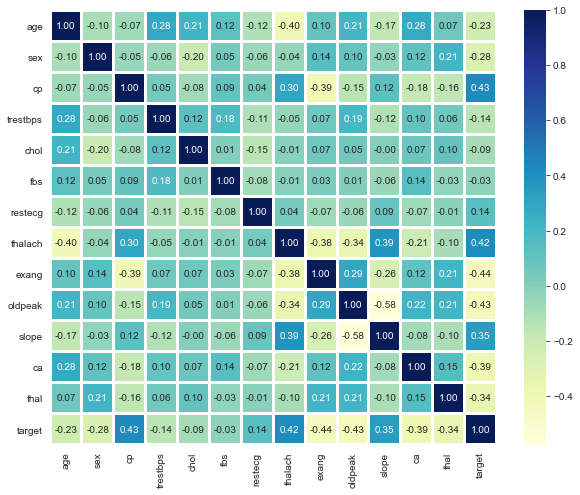

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',fmt='.2f',linewidths=2)
#Not much of correlation

In [ ]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Density'>

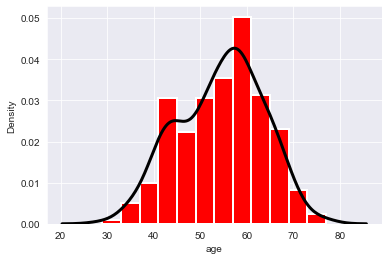

In [ ]:
sns.distplot(df['age'],color='Red',hist_kws={'alpha':1,"linewidth": 2}, kde_kws={"color": "k", "lw": 3, "label": "KDE"})
#Age of most of the people is between 40 - 60

Text(0.5, 1.0, 'Thal vs Heart Disease')

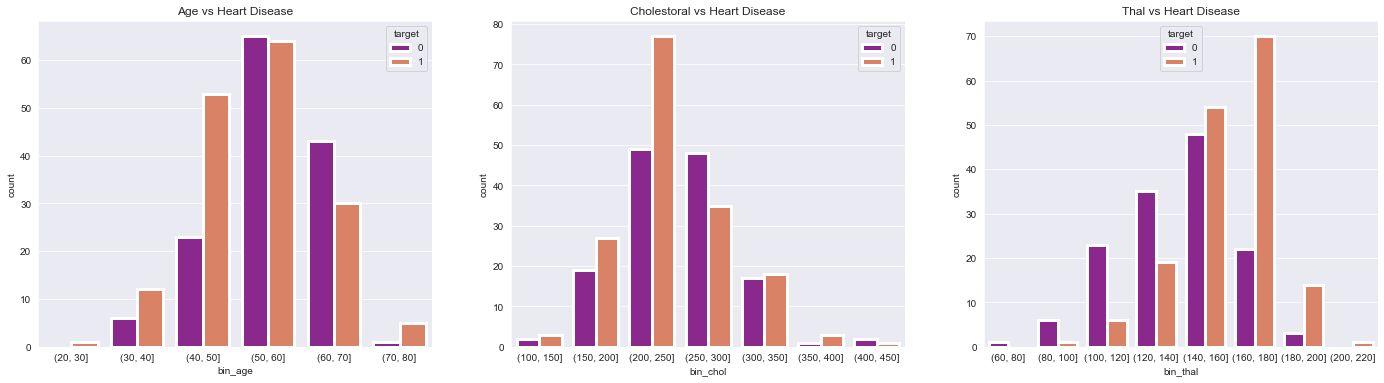

In [ ]:
fig,ax=plt.subplots(figsize=(24,6))
plt.subplot(1, 3, 1)
age_bins = [20,30,40,50,60,70,80]
df['bin_age']=pd.cut(df['age'], bins=age_bins)
g1=sns.countplot(x='bin_age',data=df ,hue='target',palette='plasma',linewidth=3)
g1.set_title("Age vs Heart Disease")
#The number of people with heart disease are more between the age group 41-55
#Also most people tend to go for checkup concerning heart disease between age 55-65 and doesn't have heart disease (Precautions)

plt.subplot(1, 3, 2)
cho_bins = [100,150,200,250,300,350,400,450]
df['bin_chol']=pd.cut(df['chol'], bins=cho_bins)
g2=sns.countplot(x='bin_chol',data=df,hue='target',palette='plasma',linewidth=3)
g2.set_title("Cholestoral vs Heart Disease")
#Most people get heart disease with cholestrol level between 200-250 
#Others with cholestrol level above 250 think they have heart disease but the rate of heart disease falls beyond 250

plt.subplot(1, 3, 3)
thal_bins = [60,80,100,120,140,160,180,200,220]
df['bin_thal']=pd.cut(df['thalach'], bins=thal_bins)
g3=sns.countplot(x='bin_thal',data=df,hue='target',palette='plasma',linewidth=3)
g3.set_title("Thal vs Heart Disease")
#People who have Thalach between 140-180 have a very high chance of getting the heart disease 

Text(0.5, 1.0, 'slope of the peak exercise ST segment')

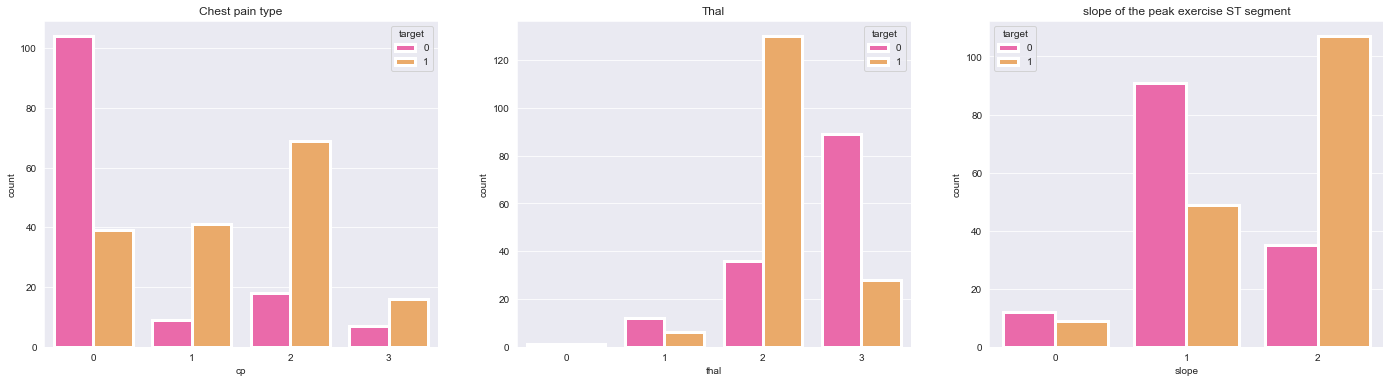

In [ ]:
fig,ax=plt.subplots(figsize=(24,6))
plt.subplot(131)
x1=sns.countplot(x='cp',data=df,hue='target',palette='spring',linewidth=3)
x1.set_title('Chest pain type')
#Chest pain type 2 people have highest chance of heart disease

plt.subplot(132)
x2=sns.countplot(x='thal',data=df,hue='target',palette='spring',linewidth=3)
x2.set_title('Thal')
#People with thal 2 have the highest chance of heart disease

plt.subplot(133)
x3=sns.countplot(x='slope',data=df,hue='target',palette='spring',linewidth=3)
x3.set_title('slope of the peak exercise ST segment')
#Slope 2 people have higher chance of heart disease

Text(0.5, 1.0, 'Figure 2')

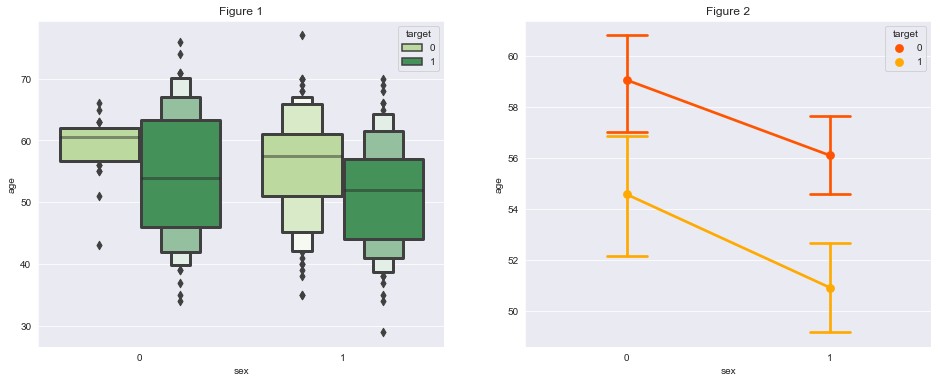

In [ ]:
fig,ax=plt.subplots(figsize=(16,6))
plt.subplot(121)
s1=sns.boxenplot(x='sex',y='age',hue='target',data=df,palette='YlGn',linewidth=3)
s1.set_title("Figure 1")
#Figure 1 says most of females having heart disease range from 40-70yrs and men from 40-60yrs

plt.subplot(122)
s2=sns.pointplot(x='sex',y='age',hue='target',data=df,palette='autumn',capsize=.2)
s2.set_title("Figure 2")
#Figure 2 says mean age for female with heart disease is around 54yrs and for male is around 51yrs

Text(0.5, 1.0, 'Age vs Cp')

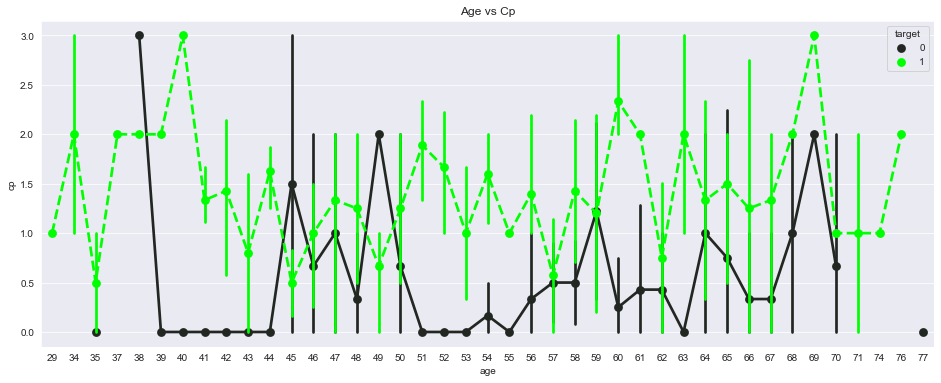

In [ ]:
fig,ax=plt.subplots(figsize=(16,6))
sns.pointplot(x='age',y='cp',data=df,color='Lime',hue='target',linestyles=["-", "--"])
plt.title('Age vs Cp')
#People with heart disease tend to have higher 'cp' at all ages only exceptions at age 45 and 49

Text(0.5, 1.0, 'Age vs Thalach')

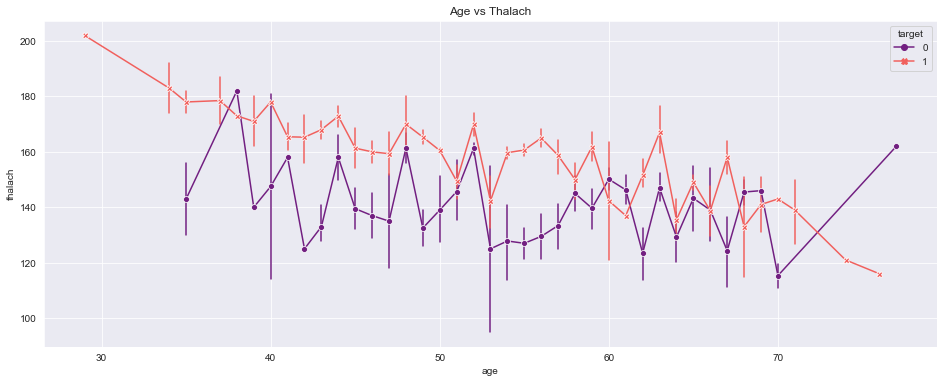

In [ ]:
fig,ax=plt.subplots(figsize=(16,6))
sns.lineplot(y='thalach',x='age',data=df,hue="target",style='target',palette='magma',markers=True, dashes=False,err_style="bars", ci=68)
plt.title('Age vs Thalach')
#Thalach always high in people having heart disease and as age increases the thalach seems to reduce and other factors might play a role in heart disease

<AxesSubplot:xlabel='sex', ylabel='thal'>

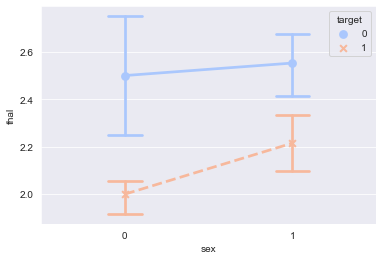

In [ ]:
sns.pointplot(x='sex',y='thal',data=df,hue='target',markers=["o", "x"],linestyles=["-", "--"],capsize=.2,palette='coolwarm')
#Both males and females without heart disease have higher thal value and males with heart diseases tend to have higher thal than females

<AxesSubplot:xlabel='ca', ylabel='count'>

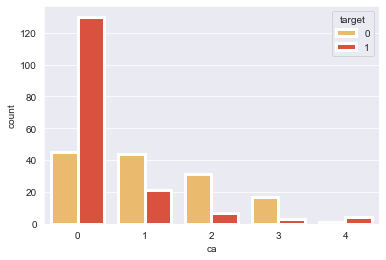

In [ ]:
sns.countplot(x='ca',data=df,hue='target',palette='YlOrRd',linewidth=3)
# People with 'ca' as 0 have highest chance of heart disease

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,bin_age,bin_chol,bin_thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,"(60, 70]","(200, 250]","(140, 160]"
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,"(30, 40]","(200, 250]","(180, 200]"
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,"(40, 50]","(200, 250]","(160, 180]"
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,"(50, 60]","(200, 250]","(160, 180]"
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,"(50, 60]","(350, 400]","(160, 180]"


In [ ]:
df.drop(['bin_age','bin_chol','bin_thal'],axis=1,inplace=True)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Modelling 


## Data Cleaning

In [ ]:
#Outlier Detection

from collections import Counter
def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(df,2,['trestbps', 'chol','thalach'])

In [ ]:
df.loc[Outliers_to_drop] # Show the outliers rows

#No outliers to drop as the values of all the columns are in ranges.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [ ]:
#Checking Missing Data
df.isnull().sum()
#No missing data

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
#Conversion to categorical variables
df['sex']=df['sex'].astype('category')
df['cp']=df['cp'].astype('category')
df['fbs']=df['fbs'].astype('category')
df['restecg']=df['restecg'].astype('category')
df['exang']=df['exang'].astype('category')
df['slope']=df['slope'].astype('category')
df['ca']=df['ca'].astype('category')
df['thal']=df['thal'].astype('category')
df['target']=df['target'].astype('category')
df.dtypes

age            int64
sex         category
cp          category
trestbps       int64
chol           int64
fbs         category
restecg     category
thalach        int64
exang       category
oldpeak      float64
slope       category
ca          category
thal        category
target      category
dtype: object

In [ ]:
y=df['target']

In [ ]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3,target_1
0,63,145,233,150,2.3,1,0,0,1,1,...,0,0,0,0,0,0,1,0,0,1
1,37,130,250,187,3.5,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,41,130,204,172,1.4,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
3,56,120,236,178,0.8,1,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4,57,120,354,163,0.6,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [ ]:
X=df.drop('target_1',axis=1)
X.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [ ]:
X.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=100)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

classifiers=[['Logistic Regression :',LogisticRegression()],
       ['Decision Tree Classification :',DecisionTreeClassifier()],
       ['Random Forest Classification :',RandomForestClassifier()],
       ['Gradient Boosting Classification :', GradientBoostingClassifier()],
       ['Ada Boosting Classification :',AdaBoostClassifier()],
       ['Extra Tree Classification :', ExtraTreesClassifier()],
       ['K-Neighbors Classification :',KNeighborsClassifier()],
       ['Support Vector Classification :',SVC()]]
cla_pred=[]
for name,model in classifiers:
    model=model
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    cla_pred.append(accuracy_score(y_test,predictions))
    print(name,accuracy_score(y_test,predictions))

Logistic Regression : 0.8681318681318682
Decision Tree Classification : 0.7802197802197802
Random Forest Classification : 0.8241758241758241
Gradient Boosting Classification : 0.7802197802197802
Ada Boosting Classification : 0.8241758241758241
Extra Tree Classification : 0.8461538461538461
K-Neighbors Classification : 0.6703296703296703
Support Vector Classification : 0.6043956043956044


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)
log_pred=logmodel.predict(X_test)
print(confusion_matrix(y_test,log_pred))
print(classification_report(y_test,log_pred))
print(accuracy_score(y_test,log_pred))

[[37  9]
 [ 3 42]]
              precision    recall  f1-score   support

           0       0.93      0.80      0.86        46
           1       0.82      0.93      0.87        45

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91

0.8681318681318682


In [ ]:
#Hyperparameter tuning for Logistic Regression
from sklearn.model_selection import GridSearchCV

hyperparameters = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1]}
h_logmodel = GridSearchCV(logmodel, hyperparameters, cv=20, verbose=0)
best_logmodel=h_logmodel.fit(X,y)
print('Best Penalty:', best_logmodel.best_estimator_.get_params()['penalty'])
print('Best C:', best_logmodel.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1


In [ ]:
logmodel=LogisticRegression(penalty='l2',C=2)
logmodel.fit(X_train,y_train)
h_log_pred=logmodel.predict(X_test)
print(confusion_matrix(y_test,h_log_pred))
print(classification_report(y_test,h_log_pred))
print(accuracy_score(y_test,h_log_pred))

[[38  8]
 [ 1 44]]
              precision    recall  f1-score   support

           0       0.97      0.83      0.89        46
           1       0.85      0.98      0.91        45

    accuracy                           0.90        91
   macro avg       0.91      0.90      0.90        91
weighted avg       0.91      0.90      0.90        91

0.9010989010989011


### So after Hyperparameter tuning, model with  Logistic Regression with gives 90% accuray!!